/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:37: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


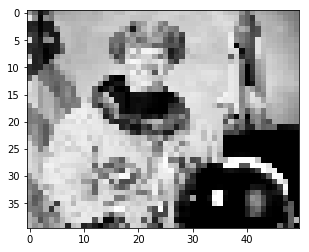

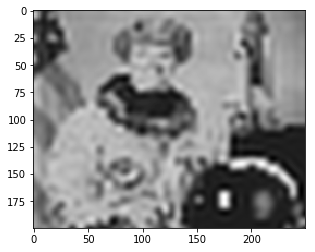

In [2]:
# 

import copy
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial
import scipy.optimize
import skimage.data
import skimage.transform

# deform an image with random interpolants

# TODO: figure out a better way of doing this
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
import register_nonrigid
import utils


im = skimage.data.astronaut()
im = np.uint8(255 * skimage.transform.resize(im, (200, 250)))

# orig sampling (where full data is)
x_range = np.arange(0, im.shape[1])
y_range = np.arange(0, im.shape[0])

xx, yy = np.meshgrid(x_range, y_range)
xin, yin = xx.flatten(), yy.flatten()

# later sampling (where sparse data is)
SAMP_SPACE = 5

# resample image
x_range_samp = np.linspace(0, im.shape[1] - 1, im.shape[1] / SAMP_SPACE)
y_range_samp = np.linspace(0, im.shape[0] - 1, im.shape[0] / SAMP_SPACE)

# im_sampled 
xx_samp, yy_samp = np.meshgrid(x_range_samp, y_range_samp)
xin_samp, yin_samp = xx_samp.flatten(), yy_samp.flatten()

im_sampled = im[:, :, 0][y_range_samp.astype('uint8')][:, x_range_samp.astype('uint8')]


# sigma - smoothness factor
SIG=6

# in matrix form, x's are y and y's are x's (unlike plot form)
x_samp = np.array([yin_samp, xin_samp]).T
y_samp = im_sampled.reshape(len(x_samp), 1)
x_data_all = np.array([yin, xin]).T

y_all = register_nonrigid.fit_rbf_interp(x_samp, x_samp, x_data_all,
                       y_samp, sigma=SIG, lam=.01)
im_estimated = y_all.reshape(xx.shape)

# show images
plt.figure(1)
plt.imshow(im_sampled.reshape(xx_samp.shape), cmap='gray')

plt.figure(2)
plt.imshow(im_estimated, cmap='gray')

plt.show()

In [3]:
# applying random transforms to images

SIG = 10
SAMP_SPACE = 5

im_deformer = register_nonrigid.ImageDeformer(
    im[:, :, 0], samp_space=SAMP_SPACE, sigma=SIG, lam=.1)


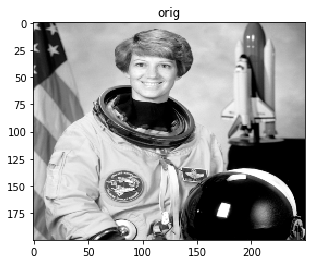

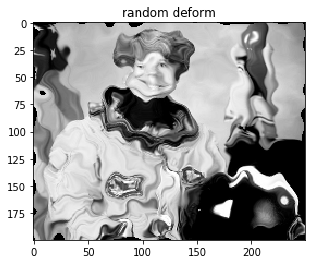

In [4]:
im_interped = im_deformer.apply_random_disps()

# show images
plt.figure(1)
plt.imshow(im[:, :, 0], cmap='gray')
plt.title('orig')

plt.figure(2)
plt.imshow(im_interped, cmap='gray')
plt.title('random deform')

plt.show()